In [3]:
!pip install opencv-contrib-python

In [3]:
import pandas

In [4]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize 
import pandas  # for resizing images

(1080, 1920, 3)


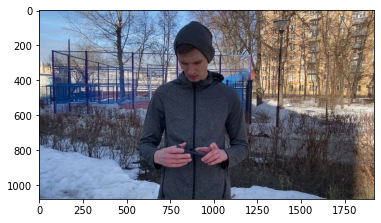

In [209]:
img = plt.imread('frame1.jpg')
print(img.shape)   # reading image using its name
plt.imshow(img)

In [286]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray,(11,11),0) 
ret3,th3 = cv2.threshold(blur,10,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [391]:
n = 72
for i in range(1,11):
  a = 0 
  for k in range(1,n+1): 
    img = plt.imread(f'frame{k}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

   
    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1+ i/10, 5)
    if len(faces) == 1:
      a += 1
        

  #print(str(len(faces)) + "  faces detected in the image.")
  print(f'{1 + i/10} = {a/n:.2%}')

  # for x, y, width, height in faces:
  #     cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
  # # сохраним полученное изображение
  # cv2.imwrite("detected.jpg", img)
  # plt.figure(figsize=(15, 8))
  # plt.title(f'image {i}')
  # plt.imshow(img)


1.1 = 26.39%
1.2 = 76.39%
1.3 = 86.11%
1.4 = 84.72%
1.5 = 83.33%
1.6 = 81.94%
1.7 = 88.89%
1.8 = 30.56%
1.9 = 81.94%
2.0 = 87.50%


,info
0,26.39
1,76.39
2,86.11
3,84.72
4,83.33


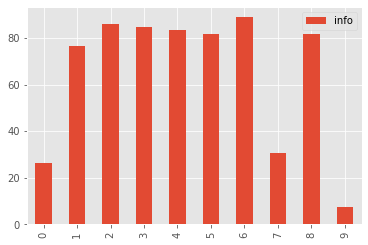

In [563]:
info = pd.DataFrame([26.39,
76.39,
86.11,
84.72,
83.33,
81.94,
88.89,
30.56,
81.94,
7.50])
info.columns = ['info']
info.plot(kind = 'bar')
info.head()

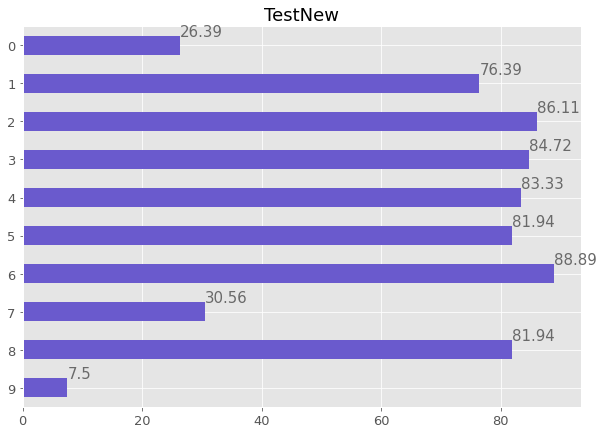

In [554]:
ax = info.plot(kind='barh', figsize=(10,7), color="slateblue", fontsize=13);
ax.set_title("TestNew", fontsize=18)
for i in ax.patches:
  ax.text(i.get_width(),i.get_y(),i.get_width(),fontsize=15, color='dimgrey')
ax.invert_yaxis()

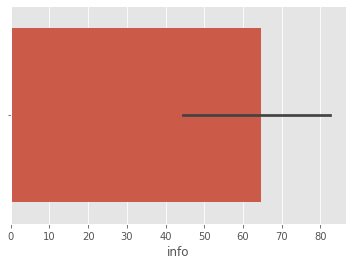

In [566]:
import seaborn as sns
sns.barplot(x="info",  data=info)

1  faces detected in the image.


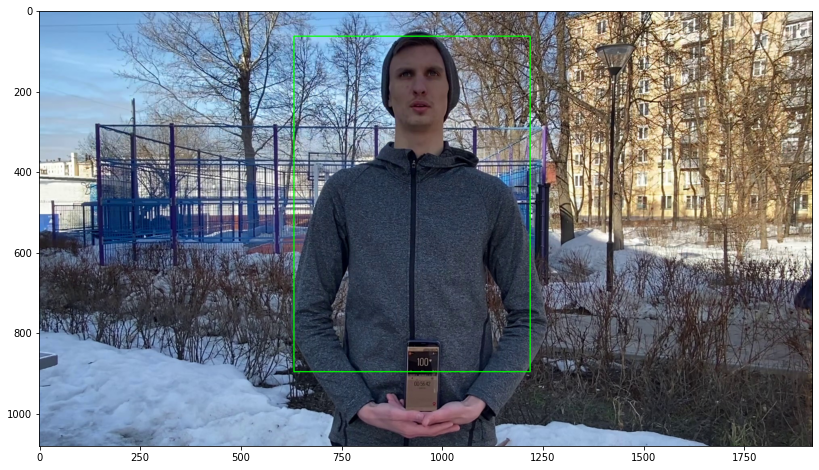

In [424]:
img = plt.imread(f'frame64.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    

   
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.7, 5)

print(str(len(faces)) + "  faces detected in the image.")


for x, y, width, height in faces:
  p = 1.25
  cv2.rectangle(img,(int(x*(2-p)) ,int((2-p)*y)),(int(x+width*p*1.5), int(y+height*p*3.25)),(0,255,0),2)

#cv2.imwrite("detected.jpg", img)
plt.figure(figsize=(15, 8))
#plt.title(f'image {i}')
plt.imshow(img)


In [2]:
import cv2     # for capturing videos
import math   # for mathematical operations
import matplotlib.pyplot as plt    # for plotting the images
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    # for mathematical operations
from keras.utils import np_utils
from skimage.transform import resize 
import pandas  # for resizing images

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D

In [3]:
def get_count(name):
  cap = cv2.VideoCapture(name)

  frameRate = cap.get(5) #frame rate
  count=1
  while(cap.isOpened()):
      frameId = cap.get(1) #current frame number
      ret, frame = cap.read()
      if (ret != True):
          break
      if (frameId % math.floor(frameRate) == 0):
          filename ="frame%d.jpg" % count;count+=1
          cv2.imwrite(filename, frame)

  cap.release()
  print (f"Done! count = {count}")
  return count

faces = face_cascade.detectMultiScale(gray, 1.7, 5)

In [260]:
#cap = cv2.VideoCapture('90and1.MOV')
def get_photo(name):
  count = get_count(name)

  file_byte_all = [] 

  for i in range(1, count):
    img = plt.imread(f'frame{i}.jpg')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        

    face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    faces = face_cascade.detectMultiScale(gray, 1.7, 5)


    if len(faces) != 1:
      continue


    for x, y, width, height in faces:
      p = 1.25
      cv2.rectangle(img,(int(x*(2-p)) ,int((2-p)*y)),(int(x+width*p*1.5), int(y+height*p*2)),(0,255,0),2)
      img2 = img[int((2-p)*y):int(y+height*p*2), int(x*(2-p)):int(x+width*p*1.5)]
      gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
      # img4 = seg.chan_vese(gray)
      # file = np.where(img4==True, gray, 0)
    
    #print(f'image {i}')
    file_byte_all.append(gray)
  
  

  return file_byte_all

In [261]:
part1 = get_photo('видео по 1 шаблону пульс 90-80.MOV')
part2 = get_photo('спокойное дыхание пульс 90.MOV')
part3 = get_photo('видео по 4 шаблону пульс 154.MOV')
#part4 = get_photo('видос по 2 шаблону.MOV')
part5 = get_photo('пульс 90-80 видео по 2 шаблону.MOV')
part6 = get_photo('пульс 116-90.MOV')
part7 = get_photo('пульс 142-108 3-4 шаблон.MOV')
part8 = get_photo('пульс 160-150 4 шаблон.MOV')
#part9 = get_photo('спокойное дыхание пульс 90.MOV')

Done! count = 66
Done! count = 73
Done! count = 52
Done! count = 66
Done! count = 68
Done! count = 50
Done! count = 56


In [262]:
file_byte_all = np.append(part2, part1, axis=0)
file_byte_all = np.append(part3, file_byte_all, axis=0)
#file_byte_all = np.append(part4, file_byte_all, axis=0)
file_byte_all = np.append(part5, file_byte_all, axis=0)
file_byte_all = np.append(part6, file_byte_all, axis=0)
file_byte_all = np.append(part7, file_byte_all, axis=0)
file_byte_all = np.append(part8, file_byte_all, axis=0)
#file_byte_all = np.append(part9, file_byte_all, axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [266]:
file_byte_all[392].shape

(522, 582)

In [ ]:
new = []

for k,i in enumerate(file_byte_all):
  img4 = seg.chan_vese(i)
  file = np.where(img4==True, i, 0)
  #new = np.append(file,new)
  new.append(file)
  print(k)


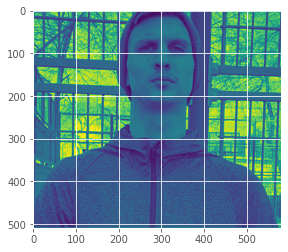

In [553]:
plt.imshow(part1[0])

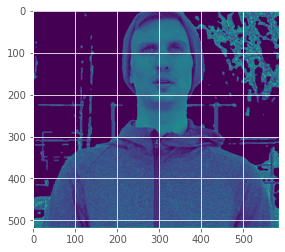

In [568]:
plt.imshow(new[320])

[142,
 142,
 142,
 142,
 142,
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 160, 160],
 [160, 160, 160, 1

In [333]:
all_photo_resize = []
all = []
for i in new:
  ph = resize(i, preserve_range=True, output_shape=(64,64)).astype(int)
  all.append(ph.reshape(-1))
  all_photo_resize.append(ph)

In [339]:
tt = (all[0] + all[1] + all[2] + all[3] + all[4]) //5
tt.shape

(4096,)

In [277]:
all_photo_resize =  np.array(all_photo_resize)
all_photo_resize.shape

(405, 128, 128)

In [278]:
df1 = pd.read_excel('video_po_1_shabl.xlsx')
df2 = pd.read_excel('spok_dyh_pyl_90.xlsx')
df3 = pd.read_excel('video_po_4_shabl_puls_154.xlsx')
#df4 = pd.read_excel('video_po_2_shabl_puls_154.xlsx')
df5 = pd.read_excel('puls_90-80_video_po_2_shab.xlsx')
df6 = pd.read_excel('puls_116-90.xlsx')
df7 = pd.read_excel('puls_142-108_3-4_shab.xlsx')
df8 = pd.read_excel('puls_160-150_4_shab.xlsx')

y1 = df1.iloc[:,1].values
y2 = df2.iloc[:,1].values
y3 = df3.iloc[:,1].values
y5 = df5.iloc[:,1].values
y6 = df6.iloc[:,1].values
y7 = df7.iloc[:,1].values
y8 = df8.iloc[:,1].values

print(y5.shape,y6.shape,y7.shape,y8.shape)
y_all = np.append(y2, y1, axis=0)
y_all = np.append(y3, y_all, axis=0)
y_all = np.append(y5, y_all, axis=0)
y_all = np.append(y6, y_all, axis=0)
y_all = np.append(y7, y_all, axis=0)
y_all = np.append(y8, y_all, axis=0)

(65,) (66,) (45,) (52,)


In [279]:
from keras.utils import to_categorical

mmm = max(y_all)+1

x_train = np.expand_dims(all_photo_resize, axis=3)
y_train_cat = to_categorical(y_all, mmm)

In [280]:
x_train.shape, y_train_cat.shape

((405, 128, 128, 1), (405, 161))

In [327]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


model = keras.Sequential([
    Conv2D(128, (4,4), padding='same', activation='relu', input_shape=(128,128, 1)),
    MaxPooling2D((3, 3), strides=2),
    Conv2D(128, (3,3), padding='same', activation='relu'),
    MaxPooling2D((3, 3), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(mmm,  activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
 

160

In [315]:
pd.DataFrame({'x': range(len(all_photo_resize)),
              'y': y_all})

,x,y
0,0,160
1,1,160
2,2,160
3,3,160
4,4,160
...,...,...
400,400,89
401,401,89
402,402,88
403,403,88


In [321]:
xx = []
yy = []

In [325]:
k = 5
for i in range(k, len(part1)):
  xx.append(list(y_all[i-k:i]))
  yy.append(y_all[i])

In [539]:
df = pd.DataFrame(all)
df['y'] = y_all

In [540]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,4057,4058,4059,4060,4061,4062,4063,4064,4065,4066,4067,4068,4069,4070,4071,4072,4073,4074,4075,4076,4077,4078,4079,4080,4081,4082,4083,4084,4085,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095,y
0,0,0,1,14,1,0,0,0,0,0,0,2,5,18,2,0,0,0,0,0,10,56,55,45,46,45,45,55,42,36,41,40,41,40,41,42,42,42,42,38,...,83,82,72,55,70,69,82,71,75,63,72,86,82,85,75,84,85,80,84,82,83,74,38,31,44,60,65,60,70,77,80,78,76,72,17,42,57,19,4,160
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,35,3,8,51,48,47,17,0,0,22,54,57,52,46,40,46,49,47,45,44,45,43,55,47,...,90,88,75,81,84,86,75,49,69,86,80,74,77,83,87,83,82,76,66,73,79,84,90,90,83,84,80,73,67,47,43,57,46,62,64,65,72,76,77,160
2,0,0,0,0,0,0,0,0,0,0,1,26,5,12,44,14,48,39,11,0,3,21,9,50,54,29,53,64,54,57,52,48,47,55,58,57,53,52,57,47,...,82,81,85,83,81,77,71,52,73,84,85,76,85,88,86,84,82,82,78,82,85,85,84,85,82,82,83,81,77,77,67,67,62,60,66,59,67,69,73,160
3,0,0,0,0,0,0,0,0,0,0,0,0,0,3,37,27,1,20,69,71,60,14,0,0,0,0,3,36,55,53,50,47,54,58,55,52,53,53,56,8,...,90,84,89,82,81,87,80,59,62,86,87,88,91,91,87,88,87,90,88,82,86,89,85,86,84,83,80,77,71,69,70,60,67,60,64,73,76,79,78,160
4,0,0,0,0,0,0,0,0,0,0,0,0,2,45,42,16,2,37,76,67,29,1,0,0,1,13,2,29,55,52,50,49,55,56,52,51,51,47,60,25,...,82,88,84,78,81,83,77,54,70,86,87,87,88,84,83,88,85,85,85,85,81,84,85,85,83,83,84,77,72,66,67,63,66,62,60,71,75,77,76,160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,0,4,22,0,0,14,15,1,30,32,20,49,39,55,50,39,45,13,0,0,20,2,0,8,17,0,1,30,46,57,62,60,59,54,43,57,54,53,55,12,...,76,78,79,76,77,79,65,56,75,75,73,77,81,78,73,73,74,72,73,75,76,76,72,69,68,69,53,34,40,52,58,56,54,55,56,63,70,76,82,89
401,0,5,20,0,0,13,9,0,38,57,12,47,35,56,72,45,43,8,0,2,21,1,0,8,11,0,3,36,55,61,64,65,63,64,62,52,40,65,54,6,...,76,80,79,77,78,81,61,60,76,74,74,79,81,76,72,73,75,72,73,75,76,74,72,67,68,69,51,37,42,52,57,56,56,56,56,65,70,79,83,89
402,0,2,21,1,0,20,20,0,9,46,11,35,47,49,32,25,53,19,0,0,21,5,0,7,19,0,3,39,50,60,62,61,58,58,59,59,54,51,59,23,...,75,79,78,78,76,80,62,60,77,74,75,81,81,74,72,74,73,70,74,78,76,73,71,68,69,68,48,38,41,52,56,55,54,56,56,67,72,77,84,88
403,0,0,18,7,0,5,29,2,1,36,21,12,46,40,50,38,48,38,0,0,13,13,0,1,22,2,4,35,46,59,62,57,46,49,53,53,56,65,77,49,...,75,76,78,79,78,78,73,53,72,79,75,79,82,78,73,75,74,70,72,76,76,77,74,73,71,70,61,35,40,47,54,55,52,55,54,61,72,73,83,88


In [533]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import precision_score, roc_auc_score

X = df.drop(['y'], axis = 1)
y = df['y'].values

X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.33, random_state=42)


In [438]:
model = LinearRegression()
model.fit(X_train, y_train)
r_sq = model.score(X_test, y_test)
print(model.score(X_train, y_train))
r_sq

1.0


0.9225071746792481

In [364]:
y_pred = y_pred.astype('int')
y_pred

array([133,  85,  85, 158, 163, 114,  92,  99,  80, 133,  80, 121, 103,
        85,  95, 141,  87,  85, 159,  92,  96,  89, 111, 128,  96,  96,
       112,  85,  97, 158,  96, 106, 131, 111, 145,  80, 148,  95, 111,
        96, 133,  95, 105, 116, 110, 100, 157,  80,  94, 112,  93, 161,
       116, 161,  85,  92, 133, 142, 162,  93, 133,  91, 159,  90, 115,
        90,  90, 110, 160,  83, 127, 102, 112,  92, 102, 158, 159, 109,
       144,  83,  86,  97, 156, 154, 162, 105, 114,  83, 134,  94,  86,
        82, 114,  96, 110,  87,  86,  91, 148,  85,  90,  86, 127, 114,
       115, 158, 134, 130, 154, 161,  87,  85,  79,  92,  93,  91,  86,
        94, 132, 114,  92,  93, 100,  89, 115, 161,  84, 156, 132,  94,
       147,  95,  85, 153])

In [404]:
y_pred = model.predict(X_test).astype('int')


In [431]:
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
import xgboost
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, accuracy_score

clf = RandomForestRegressor(random_state=0)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
clf.score(X_train, y_train)

0.9021702959653092


0.9871579048223271

In [397]:
train = []
test = []
for i in range(100,601,10):  
  model = RandomForestClassifier(n_estimators=i, max_depth=70)
  model.fit(X_train, y_train)

  #print(classification_report(y_test, model.predict(X_test)))
  test.append(accuracy_score(y_test, model.predict(X_test)))
  train.append(accuracy_score(y_train, model.predict(X_train)))

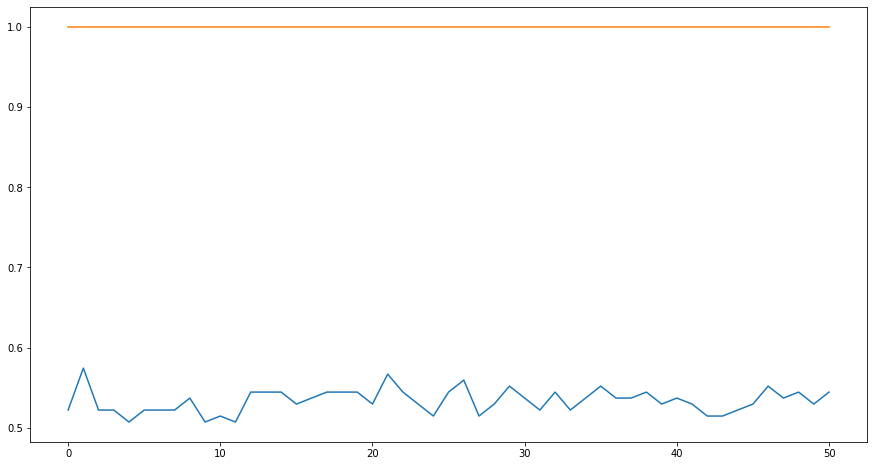

In [401]:
plt.figure(figsize = (15,8))
plt.plot(range(len(test)), test)
plt.plot(range(len(train)), train)

In [394]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'n_estimators':range(100,601,100),
              #'max_depth': range(10,100,10),
              'min_samples_leaf': range(1,4)}
svc = RandomForestClassifier()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


KeyboardInterrupt: ignored

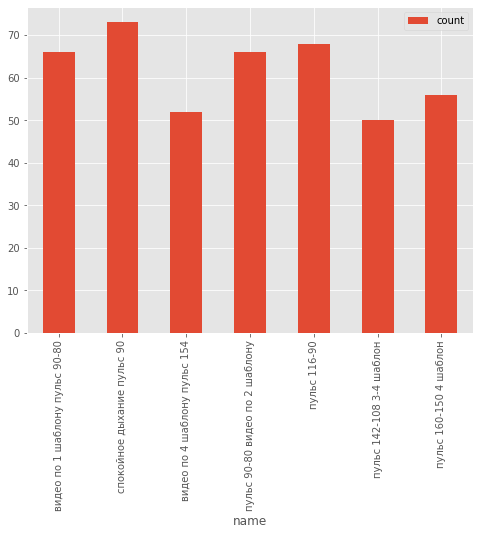

In [512]:
df = pd.DataFrame({'name': ind,
              'count': [66, 73, 52, 66, 68, 50, 56]})
df.plot.bar(x = 'name', figsize = (8,6))

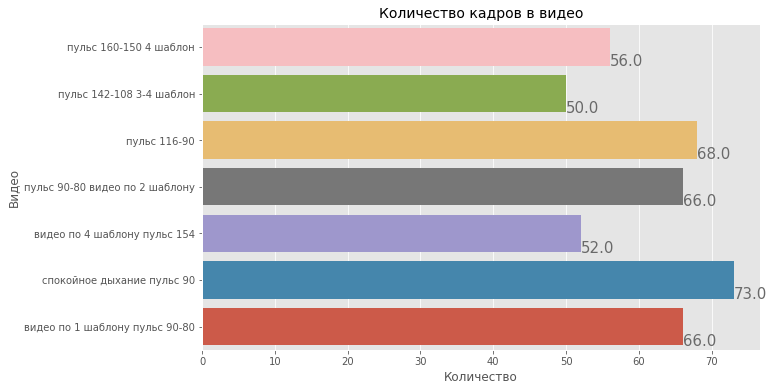

In [522]:
import seaborn as sns
plt.figure(figsize=(10,6))
b = sns.barplot(y="name", x="count", data=df)
b.axes.set_title("Количество кадров в видео",fontsize=14)
b.set_xlabel("Количество",fontsize=12)
b.set_ylabel("Видео",fontsize=12)
for i in b.patches:
  b.text(i.get_width(),i.get_y(),i.get_width(),fontsize=15, color='dimgrey')
b.invert_yaxis()

In [408]:
ind = ['видео по 1 шаблону пульс 90-80', 'спокойное дыхание пульс 90'
,'видео по 4 шаблону пульс 154'
,'пульс 90-80 видео по 2 шаблону'
,'пульс 116-90'
,'пульс 142-108 3-4 шаблон'
,'пульс 160-150 4 шаблон']
ind

['видео по 1 шаблону пульс 90-80',
 'спокойное дыхание пульс 90',
 'видео по 4 шаблону пульс 154',
 'пульс 90-80 видео по 2 шаблону',
 'пульс 116-90',
 'пульс 142-108 3-4 шаблон',
 'пульс 160-150 4 шаблон']

In [376]:
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

     |████████████████████████████████| 67.3MB 53kB/s 


In [367]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train_cat, test_size=0.1, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((364, 128, 128, 1), (41, 128, 128, 1), (364, 161), (41, 161))

In [439]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import (mean_squared_error, r2_score)
knn=KNeighborsRegressor(n_jobs=-1)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("Score тестовой:",knn.score(X_test, y_test))
print("Score обучающей:",knn.score(X_train, y_train))
print("MSE:",mean_squared_error(y_test, knn.predict(X_test)))
r2 = r2_score(y_test, knn_pred)
print(f'R^2 = {r2}')

Score тестовой: 0.8697426703368117
Score обучающей: 0.9514303327251288
MSE: 104.21462686567166
R^2 = 0.8697426703368117


In [440]:
import matplotlib.pyplot as plt


def show_parameter_selection(train_acc, test_acc, grid, xlabel, ymin=0.8, ymax=1.005):
    plt.style.use('ggplot')
    %matplotlib inline
    train_acc, test_acc = np.asarray(train_acc), np.asarray(test_acc)
    fig, ax = plt.subplots(figsize=(8, 4))
    ax.plot(grid, train_acc, alpha=0.5, color='blue', label='train')
    ax.plot(grid, test_acc, alpha=0.5, color='red', label='test')
    ax.set_title("Подбор " + xlabel)
    ax.legend(loc='best')
    ax.set_ylim([ymin,ymax])
    ax.set_ylabel("recall")
    ax.set_xlabel(xlabel)

In [497]:
train_acc

[0.7490509541690357,
 0.7044884702834635,
 0.7068248331988491,
 0.7007770741975172,
 0.6422856243156185,
 0.6605537364370564,
 0.6928393566511931,
 0.7009415734935879,
 0.7019256197296943]

In [477]:
test_acc

[0.9360380456871715, 0.9995110038141176, 1.0, 1.0, 1.0, 1.0]

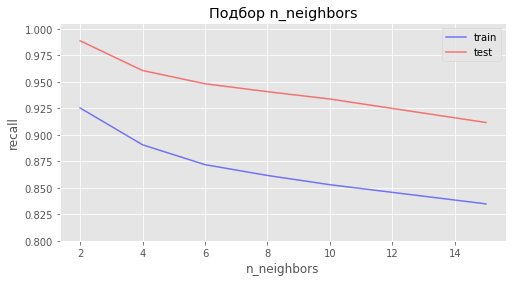

In [470]:
train_acc = []
test_acc = []
n_neighbors_grid = [2,4,6,8,10,15]
for n_neighbors in n_neighbors_grid:
  knn = KNeighborsRegressor(n_neighbors=n_neighbors, n_jobs=-1)
  knn.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, knn.predict(X_test)))
  test_acc.append(r2_score(y_train, knn.predict(X_train)))

show_parameter_selection(train_acc, test_acc, n_neighbors_grid, "n_neighbors")

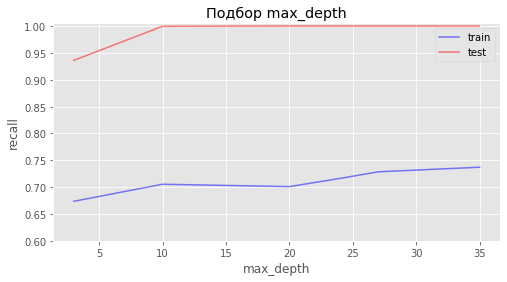

In [489]:
from sklearn.tree import DecisionTreeRegressor

train_acc = []
test_acc = []
max_depth_grid = [3, 10, 20, 24,27,35]
for max_depth in max_depth_grid:
  dt = DecisionTreeRegressor(max_depth=max_depth)
  dt.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, dt .predict(X_test)))
  test_acc.append(r2_score(y_train, dt .predict(X_train)))

show_parameter_selection(train_acc, test_acc, max_depth_grid, "max_depth",ymin=0.6)

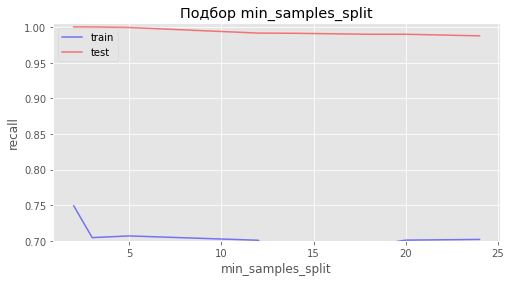

In [496]:
from sklearn.tree import DecisionTreeRegressor

train_acc = []
test_acc = []
min_samples_split_grid = [2,3, 5,12,14,16,18,20,24]
for min_samples_split in min_samples_split_grid:
  dt = DecisionTreeRegressor(min_samples_split=min_samples_split)
  dt.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, dt .predict(X_test)))
  test_acc.append(r2_score(y_train, dt .predict(X_train)))

show_parameter_selection(train_acc, test_acc, min_samples_split_grid, "min_samples_split",ymin=0.7)

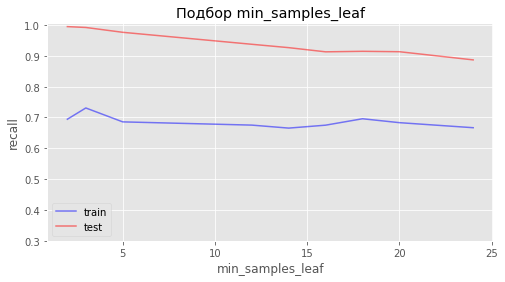

In [501]:
from sklearn.tree import DecisionTreeRegressor

train_acc = []
test_acc = []
min_samples_leaf_grid = [2,3, 5,12,14,16,18,20,24]
for min_samples_leaf in min_samples_leaf_grid:
  dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
  dt.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, dt .predict(X_test)))
  test_acc.append(r2_score(y_train, dt .predict(X_train)))

show_parameter_selection(train_acc, test_acc, min_samples_leaf_grid, "min_samples_leaf",ymin=0.3)

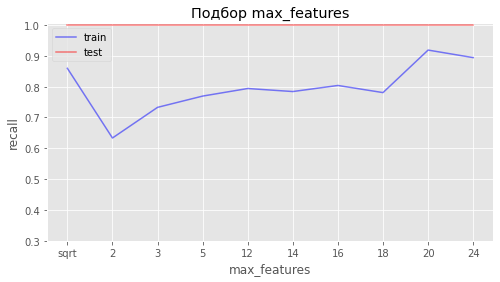

In [504]:
from sklearn.tree import DecisionTreeRegressor

train_acc = []
test_acc = []
max_features_grid = ["sqrt",2,3, 5,12,14,16,18,20,24]
for max_features in max_features_grid:
  dt = DecisionTreeRegressor(max_features=max_features)
  dt.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, dt .predict(X_test)))
  test_acc.append(r2_score(y_train, dt .predict(X_train)))

show_parameter_selection(train_acc, test_acc, max_features_grid, "max_features",ymin=0.3)

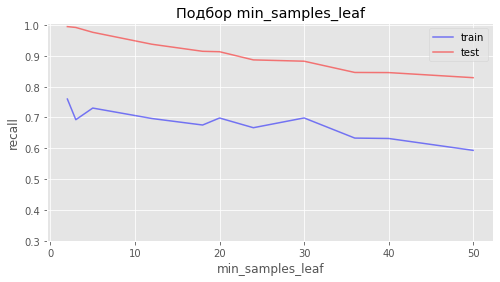

In [507]:
from sklearn.tree import DecisionTreeRegressor

train_acc = []
test_acc = []
min_samples_leaf_grid = [2,3, 5,12,18,20,24,30,36,40,50]
for min_samples_leaf in min_samples_leaf_grid:
  dt = DecisionTreeRegressor(min_samples_leaf=min_samples_leaf)
  dt.fit(X_train, y_train)

  train_acc.append(r2_score(y_test, dt .predict(X_test)))
  test_acc.append(r2_score(y_train, dt .predict(X_train)))

show_parameter_selection(train_acc, test_acc, min_samples_leaf_grid, "min_samples_leaf",ymin=0.3)

In [527]:
tree = DecisionTreeRegressor()
tree_params = {'max_depth': range(30,60),
'min_samples_leaf':range(15,30),
'max_features': ["sqrt",2,18,20,24,28,34]}
tree_grid = GridSearchCV(tree, tree_params,
cv=5, #кол-во разбиений
n_jobs=-1,#все процессоры
verbose=True)

tree_grid.fit(X_train, y_train)
 
print(tree_grid.best_params_)
 
tree_grid.best_score_

Fitting 5 folds for each of 3150 candidates, totalling 15750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [570]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
fold_no = 1
mse=[]
R2_m=[]
print("DecisionTreeRegressor")
for train_index, test_index in skf.split(df, df['y']):
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  dr=DecisionTreeRegressor({'max_depth': 36, 'max_features': 28, 'min_samples_leaf': 16})
  y_train=train['y']
  X_train=train.drop(['y'],axis=1)
  y_test=test['y']
  X_test=test.drop(['y'],axis=1)
  dt.fit(X_train, y_train)
  print("Fold ",fold_no)
  print(f" Score тестовой:",dt.score(X_test, y_test))
  print("Score обучающей:",dt.score(X_train, y_train))
  print("MSE:",mean_squared_error(y_test, dt.predict(X_test)))
  mse.append(mean_squared_error(y_test, dt.predict(X_test)))
  R2_m.append(r2_score(y_test, dt.predict(X_test)))
  fold_no += 1
print()
print("Crossval MSE:",pd.Series(mse).mean())
print("Crossval r2:",pd.Series(R2_m).mean())

DecisionTreeRegressor
Fold  1
 Score тестовой: 0.6646385499823171


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Score обучающей: 0.8100245283987547
MSE: 260.78771577063236
Fold  2
 Score тестовой: 0.6204065306767801
Score обучающей: 0.8007093314350375
MSE: 293.5645484234755
Fold  3
 Score тестовой: 0.6089758359084632
Score обучающей: 0.8140716388218028
MSE: 299.1200759222036
Fold  4
 Score тестовой: 0.6414025868047739
Score обучающей: 0.8585420730249465
MSE: 272.2927828499168
Fold  5
 Score тестовой: 0.7112780559325975
Score обучающей: 0.8119127661921576
MSE: 223.48196217712137

Crossval MSE: 269.84941702866996
Crossval r2: 0.6493403118609864


In [571]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
fold_no = 1
mse=[]
R2_m=[]
print("KNeighborsRegressor")
for train_index, test_index in skf.split(df, df['y']):
  train = df.loc[train_index,:]
  test = df.loc[test_index,:]
  knn = KNeighborsRegressor(n_neighbors=14, n_jobs=-1)
  y_train=train['y']
  X_train=train.drop(['y'],axis=1)
  y_test=test['y']
  X_test=test.drop(['y'],axis=1)
  knn.fit(X_train, y_train)
  print("Fold ",fold_no)
  print(f" Score тестовой:",knn.score(X_test, y_test))
  print("Score обучающей:",knn.score(X_train, y_train))
  print("MSE:",mean_squared_error(y_test, knn.predict(X_test)))
  mse.append(mean_squared_error(y_test, knn.predict(X_test)))
  R2_m.append(r2_score(y_test, knn.predict(X_test)))
  fold_no += 1
print()
print("Crossval MSE:",pd.Series(mse).mean())
print("Crossval r2:",pd.Series(R2_m).mean())

KNeighborsRegressor
Fold  1


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


 Score тестовой: 0.8350249892742025
Score обучающей: 0.9266251948222243
MSE: 128.289808515999
Fold  2
 Score тестовой: 0.882029439153544
Score обучающей: 0.9324375681483391
MSE: 91.2343789367599
Fold  3
 Score тестовой: 0.9489428036394058
Score обучающей: 0.9169441373301926
MSE: 39.05700428319477
Fold  4
 Score тестовой: 0.9230748314585735
Score обучающей: 0.9179824704449611
MSE: 58.41137566137567
Fold  5
 Score тестовой: 0.910197375448257
Score обучающей: 0.9169196827171033
MSE: 69.51070798689844

Crossval MSE: 77.30065507684556
Crossval r2: 0.8998538877947965


In [ ]:
from sklearn.model_selection import StratifiedKFold

tree = DecisionTreeRegressor()
tree_params = {'max_depth': range(30,60),
'min_samples_leaf':range(15,30),
'max_features': ["sqrt",2,18,20,24,28,34]}
tree_grid = GridSearchCV(tree, tree_params,
cv=5, #кол-во разбиений
n_jobs=-1,#все процессоры
verbose=True)

tree_grid.fit(X_train, y_train)
 
print(tree_grid.best_params_)
 
tree_grid.best_score_

In [329]:
hist = model.fit(X_train, y_train, batch_size=4, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
91/91 [==============================] - 64s 697ms/step - loss: 25.6607 - accuracy: 0.1778 - val_loss: 2.9793 - val_accuracy: 0.4390
Epoch 2/5
91/91 [==============================] - 63s 695ms/step - loss: 2.2149 - accuracy: 0.4821 - val_loss: 3.2359 - val_accuracy: 0.3902
Epoch 3/5
91/91 [==============================] - 63s 696ms/step - loss: 1.4642 - accuracy: 0.6097 - val_loss: 3.1304 - val_accuracy: 0.3415
Epoch 4/5
91/91 [==============================] - 63s 695ms/step - loss: 0.8835 - accuracy: 0.7355 - val_loss: 3.6727 - val_accuracy: 0.3902
Epoch 5/5
91/91 [==============================] - 63s 696ms/step - loss: 0.7131 - accuracy: 0.7643 - val_loss: 4.0731 - val_accuracy: 0.3902


In [291]:
hist.history

{'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0],
 'loss': [0.0010408498346805573,
  0.0007559569203294814,
  0.0005649570375680923,
  0.00044959294609725475,
  0.0003628875419963151],
 'val_accuracy': [0.4754098355770111,
  0.4754098355770111,
  0.4754098355770111,
  0.4836065471172333,
  0.4836065471172333],
 'val_loss': [7.891628265380859,
  8.030831336975098,
  8.123820304870605,
  8.22888469696045,
  8.322797775268555]}

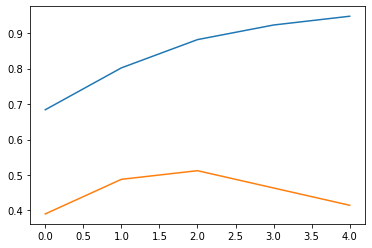

In [298]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [51]:
y_all[5:10]

array([160, 160, 160, 160, 160])

In [58]:
x_train = []
y_train = []

k = 5
for i in range(k, y_all.shape[0]):
  x_train.append(y_all[i-k: i])
  y_train.append(y_all[i])


In [60]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [61]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [63]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [79]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences = False))
model.add(Dense(25))
model.add(Dense(1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [427]:
df1.iloc[0,1]

91

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
    x_train, y_train, test_size=0.3, random_state=42)

In [80]:
model.fit(X_train, y_train, epochs = 20, validation_data=(X_test,y_test))

Epoch 1/20
9/9 [==============================] - 5s 121ms/step - loss: 12124.7367 - val_loss: 13205.4990
Epoch 2/20
9/9 [==============================] - 0s 15ms/step - loss: 12094.1733 - val_loss: 12437.1553
Epoch 3/20
9/9 [==============================] - 0s 15ms/step - loss: 11447.1214 - val_loss: 11339.6709
Epoch 4/20
9/9 [==============================] - 0s 16ms/step - loss: 10405.9096 - val_loss: 10096.3574
Epoch 5/20
9/9 [==============================] - 0s 15ms/step - loss: 9091.5158 - val_loss: 8867.0312
Epoch 6/20
9/9 [==============================] - 0s 15ms/step - loss: 7842.5622 - val_loss: 7739.0020
Epoch 7/20
9/9 [==============================] - 0s 15ms/step - loss: 6607.4431 - val_loss: 6698.9751
Epoch 8/20
9/9 [==============================] - 0s 14ms/step - loss: 5746.9951 - val_loss: 5734.1089
Epoch 9/20
9/9 [==============================] - 0s 14ms/step - loss: 5328.7464 - val_loss: 4845.7905
Epoch 10/20
9/9 [==============================] - 0s 16ms/step 

In [68]:
y_train

array([160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
       160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
       160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160, 160,
       160, 160, 160, 160, 158, 153, 150, 150, 142, 142, 142, 142, 142,
       142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142, 142,
       142, 142, 142, 136, 121, 114, 112, 108, 106, 107, 108, 108, 108,
       109, 109, 110, 110, 111, 111, 110, 109, 108, 109, 108, 109, 108,
       109, 116, 116, 116, 116, 116, 115, 115, 116, 116, 116, 116, 116,
       116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116, 116,
       116, 116, 114, 109, 106, 106, 106, 103,  98,  95,  95,  95,  95,
        93,  94,  94,  94,  94,  94,  94,  94,  94,  93,  93,  93,  93,
        93,  92,  92,  92,  92,  92,  92,  91,  91,  92,  92,  91,  91,
        91,  90,  77,  78,  81,  85,  90,  92,  93,  93,  92,  92,  92,
        92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  9

In [199]:
cap = cv2.VideoCapture('видео по 1 шаблону пульс 90-80.MOV')

frameRate = cap.get(5) #frame rate
count=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)

cap.release()
print (f"Done! count = {count}")

Done! count = 66


In [200]:
file_byte = []
file_byte_all = [] 
list_faces = []
faces_shape = []

for i in range(1, count):
  img = plt.imread(f'frame{i}.jpg')
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        

  face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
  faces = face_cascade.detectMultiScale(gray, 1.7, 5)

  #print(str(len(faces)) + "  faces detected in the image." + f'img = {i}')

  if len(faces) != 1:
    continue


  for x, y, width, height in faces:
    p = 1.25
    cv2.rectangle(img,(int(x*(2-p)) ,int((2-p)*y)),(int(x+width*p*1.5), int(y+height*p*3.25)),(0,255,0),2)
    img2 = img[int((2-p)*y):int(y+height*p*3.25), int(x*(2-p)):int(x+width*p*1.5)]
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    img4 = seg.chan_vese(gray)
    file = np.where(img4==True, gray, 0)


  #file_byte.append(img)
  file_byte_all.append(file)
  #list_faces.append(faces)
  #faces_shape.append(img2.shape)

KeyboardInterrupt: ignored

In [1]:
file_byte_all = np.array(file_byte_all)
file_byte_all.shape

NameError: ignored

In [33]:
all_photo_resize = []
for i in file_byte_all:
  ph = resize(i, preserve_range=True, output_shape=(28,28)).astype(int)
  all_photo_resize.append(ph)
  #print(ph.shape)

  # print(photo.shape)
  # plt.imshow(photo)


In [34]:
all_photo_resize = np.array(all_photo_resize)
all_photo_resize.shape

(65, 28, 28)

In [69]:
df = pd.read_excel('video_po_1_shabl.xlsx')
X = df.iloc[:,1]
y = df.iloc[:,0]
df.head()

,number,video_po_1_shabl
0,0,91
1,1,91
2,2,91
3,3,91
4,4,91


In [13]:
from keras.utils import to_categorical
y_train = to_categorical(y, 92)
y_train.shape

(65, 92)

In [24]:
x_train = np.expand_dims(all_photo_resize, axis=3)
x_train.shape

(65, 800, 550, 1)

In [450]:
part_test = get_photo('Видео для теста.MOV')

Done! count = 80


In [453]:
#part_test = np.array(part_test)

AttributeError: ignored

In [455]:
new_test = []
for k,i in enumerate(part_test):
  img4 = seg.chan_vese(i)
  file = np.where(img4==True, i, 0)
  #new = np.append(file,new)
  new_test.append(file)
  print(k)

52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78


In [465]:
test =[]
for i in new_test:
  test.append(i.reshape(-1))

In [478]:

all11 = []
for i in new:
  ph = resize(i, preserve_range=True, output_shape=(64,64)).astype(int)
  all11.append(ph.reshape(-1))


In [488]:
X_valid = pd.DataFrame(all11)

pd.Series(model.predict(X_valid)).round(0).to_list()

[132.0,
 160.0,
 160.0,
 154.0,
 160.0,
 158.0,
 160.0,
 154.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 158.0,
 159.0,
 162.0,
 163.0,
 161.0,
 160.0,
 160.0,
 162.0,
 160.0,
 156.0,
 157.0,
 160.0,
 160.0,
 160.0,
 160.0,
 159.0,
 160.0,
 160.0,
 159.0,
 160.0,
 160.0,
 160.0,
 160.0,
 160.0,
 163.0,
 160.0,
 160.0,
 164.0,
 160.0,
 160.0,
 160.0,
 161.0,
 160.0,
 158.0,
 153.0,
 150.0,
 150.0,
 142.0,
 142.0,
 142.0,
 96.0,
 148.0,
 133.0,
 142.0,
 142.0,
 132.0,
 142.0,
 142.0,
 134.0,
 142.0,
 142.0,
 135.0,
 142.0,
 142.0,
 142.0,
 134.0,
 142.0,
 142.0,
 133.0,
 121.0,
 128.0,
 113.0,
 114.0,
 121.0,
 114.0,
 108.0,
 108.0,
 111.0,
 109.0,
 112.0,
 110.0,
 110.0,
 111.0,
 111.0,
 110.0,
 110.0,
 108.0,
 109.0,
 114.0,
 107.0,
 108.0,
 109.0,
 116.0,
 116.0,
 116.0,
 116.0,
 111.0,
 115.0,
 115.0,
 111.0,
 116.0,
 116.0,
 116.0,
 110.0,
 116.0,
 115.0,
 116.0,
 116.0,
 115.0,
 117.0,
 116.0,
 117.0,
 116.0,
 115.0,
 116.0,
 116.0,
 116.0,
 116.0,
 116.0,
 112.0,
 

In [481]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
x_train = all_photo_resize

x_train = x_train / 255
x_train.shape


(65, 28, 28)

In [36]:
x_train = np.expand_dims(x_train, axis=3)
x_train.shape

(65, 28, 28, 1)

In [37]:
import keras

y_train = df.iloc[:,0]
y_train.shape
y_train_cat = keras.utils.to_categorical(y_train, num_classes=91+1)
y_train_cat.shape

(65, 92)

In [38]:
x_train.shape, y_train_cat.shape

((65, 28, 28, 1), (65, 92))

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist         # библиотека базы выборок Mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D


model = keras.Sequential([
    Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28, 1)),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(512, (3,3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(92,  activation='softmax')
])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])
 
model.fit(x_train, y_train_cat, batch_size=4, epochs=40, validation_split=0.2)

Epoch 1/40
13/13 [==============================] - 1s 78ms/step - loss: 4.6064 - accuracy: 0.0000e+00 - val_loss: 4.5432 - val_accuracy: 0.0000e+00
Epoch 2/40
13/13 [==============================] - 1s 64ms/step - loss: 4.5071 - accuracy: 0.0000e+00 - val_loss: 4.6024 - val_accuracy: 0.0000e+00
Epoch 3/40
13/13 [==============================] - 1s 65ms/step - loss: 4.4606 - accuracy: 0.0582 - val_loss: 5.0461 - val_accuracy: 0.0000e+00
Epoch 4/40
13/13 [==============================] - 1s 63ms/step - loss: 4.3099 - accuracy: 0.0000e+00 - val_loss: 5.3610 - val_accuracy: 0.0000e+00
Epoch 5/40
13/13 [==============================] - 1s 66ms/step - loss: 4.2443 - accuracy: 0.0373 - val_loss: 6.0548 - val_accuracy: 0.0000e+00
Epoch 6/40
13/13 [==============================] - 1s 65ms/step - loss: 4.1675 - accuracy: 0.0000e+00 - val_loss: 6.3379 - val_accuracy: 0.0000e+00
Epoch 7/40
13/13 [==============================] - 1s 66ms/step - loss: 4.0887 - accuracy: 0.0000e+00 - val_loss:

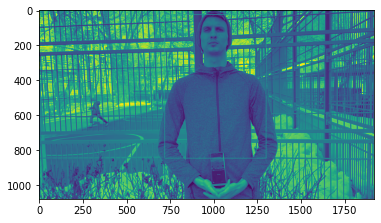

In [83]:
img11 = part1[0]
img22 = cv2.flip(img11,1)
plt.imshow(img22)

In [57]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [82]:
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))

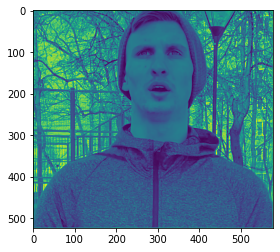

In [167]:
img = plt.imread(f'frame30.jpg')
gray1 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray1, 1.7, 5)
for x, y, width, height in faces:
    p = 1.25
    cv2.rectangle(img,(int(x*(2-p)) ,int((2-p)*y)),(int(x+width*p*1.5), int(y+height*p*2)),(0,255,0),2)
    img2 = img[int((2-p)*y):int(y+height*p*2), int(x*(2-p)):int(x+width*p*1.5)]
    img22 = cv2.flip(img2,1)
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

plt.imshow(gray)

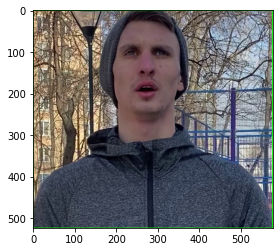

In [160]:
plt.imshow(img22)

In [99]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

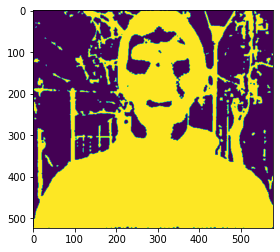

In [177]:
img4 = seg.chan_vese(gray)
plt.imshow(img4)

In [179]:
gray.shape

(524, 578)

In [189]:
gray[img4 == True].shape

(176660,)

In [191]:
img4

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True, False],
       [ True,  True,  True, ...,  True, False, False]])

In [198]:
a = np.array([
              [1,2,3],
              [4,5,6]
])
b = np.array([
              [0,2,3],
              [5,5,3]
])


np.where(img4==True, gray, 0)

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0, 150,  72, ...,  74,  74, 150],
       [150, 150,  75, ...,  65,  65,   0],
       [150, 150, 150, ..., 150,   0,   0]], dtype=uint8)

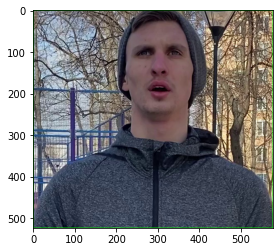

In [178]:
plt.imshow(img2)

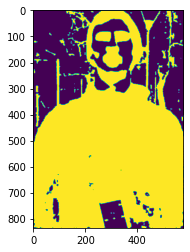

In [145]:
img = seg.chan_vese(gray, mu = 0.1)
plt.imshow(img)